In [1]:
#-------------------------- Standard Imports --------------------------#
%reload_ext autoreload
%autoreload 2
import kdephys as kde
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import acr
#plt.style.use('fast')
#plt.style.use('/home/kdriessen/gh_master/kdephys/kdephys/plot/acr_plots.mplstyle')

# ---------------------------- EXTRAS --------------------------------#
from acr.utils import swi_subs_exps, sub_probe_locations, sub_exp_types
import pingouin as pg
band_def = list(kde.utils.spectral.bands.keys())

/home/kdriessen/miniconda3/envs/acr/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/kdriessen/miniconda3/envs/acr/lib/python3.11/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
reb_df = acr.io.read_full_df(folder='rebound_data_1h')
#reb_df = reb_df.loc[reb_df.state == 'NREM']
#reb_df = reb_df.loc[reb_df['Band']=='delta']
reb_df = reb_df.sort_values('subject')

/home/kdriessen/miniconda3/envs/acr/lib/python3.11/site-packages/outdated/utils.py:14: OutdatedCacheFailedWarning: Failed to use cache while checking for outdated package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [3]:
delta_acr = reb_df.loc[reb_df['Band']=='delta'].loc[reb_df['state']=='NREM'].loc[reb_df['exp_type']=='acr']
delta_acr_means = delta_acr.groupby(['subject', 'exp', 'store'])['Bandpower'].mean().to_frame().reset_index().sort_values('Bandpower')
acr_swa = delta_acr_means.exp_names()

In [20]:
# Colors
BG_WHITE = "#fbf9f4"
GREY_LIGHT = "#b4aea9"
GREY50 = "#7F7F7F"
BLUE_DARK = "#1B2838"
BLUE = "#2a475e"
BLACK = "#282724"
GREY_DARK = "#747473"
RED_DARK = "#850e00"

# Colors taken from Dark2 palette in RColorBrewer R library
COLOR_SCALE = ["#1B9E77", "#D95F02", "#7570B3"]

# Horizontal positions for the violins. 
# They are arbitrary numbers. They could have been [-1, 0, 1] for example.
POSITIONS = [1, 2]

# Horizontal lines
HLINES = [1.5, 2, 2.5]

In [21]:
y_data = [[acr_swa.expmt('swi').prb('NNXr')['Bandpower'].values], [acr_swa.expmt('swi').prb('NNXo')['Bandpower'].values]]

In [26]:
y_data

[[array([1.6279908, 1.792361 , 1.914755 , 2.063528 , 2.4540882, 2.6580534,
         2.912399 ], dtype=float32)],
 [array([1.3978883, 1.4653416, 1.4795825, 1.6479127, 1.6738507, 2.044872 ,
         2.5592384], dtype=float32)]]

ValueError: X must have 2 or fewer dimensions

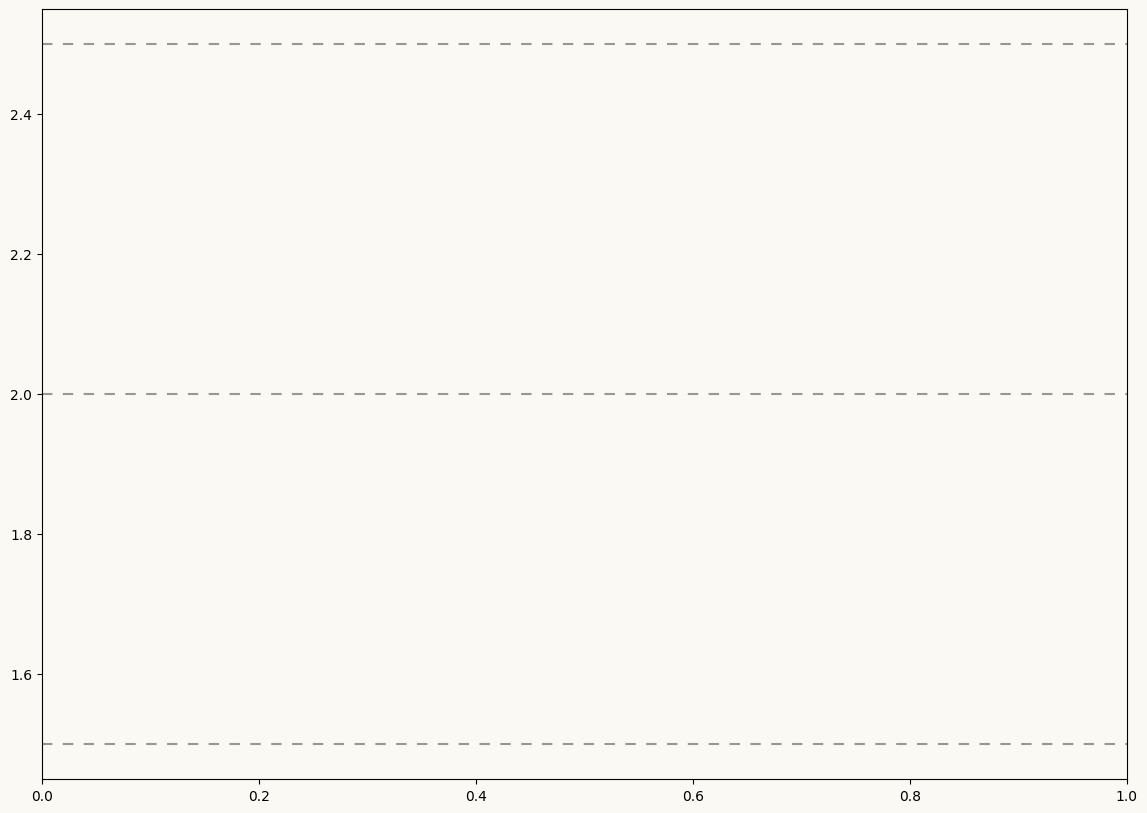

In [22]:
fig, ax = plt.subplots(figsize= (14, 10))

# Some layout stuff ----------------------------------------------
# Background color
fig.patch.set_facecolor(BG_WHITE)
ax.set_facecolor(BG_WHITE)

# Horizontal lines that are used as scale reference
for h in HLINES:
    ax.axhline(h, color=GREY50, ls=(0, (5, 5)), alpha=0.8, zorder=0)

# Add violins ----------------------------------------------------
# bw_method="silverman" means the bandwidth of the kernel density
# estimator is computed via Silverman's rule of thumb. 
# More on this in the bonus track ;)

# The output is stored in 'violins', used to customize their appearence
violins = ax.violinplot(
    y_data,
    positions=POSITIONS,
    widths=0.45,
    bw_method="silverman",
    showmeans=False, 
    showmedians=False,
    showextrema=False,
)

# Customize violins (remove fill, customize line, etc.)
for pc in violins["bodies"]:
    pc.set_facecolor("none")
    pc.set_edgecolor(BLACK)
    pc.set_linewidth(1.4)
    pc.set_alpha(1)